## **Introduction to Normalizing Flows**

Normalizing flows are a class of probabilistic models that transform a simple probability distribution into a more complex one through a sequence of invertible and differentiable mappings. This framework is particularly powerful for tasks like density estimation, generative modeling, and variational inference because it allows for exact likelihood computation and efficient sampling.

---

**Core Concepts**

1. **Invertible Transformations**

   The foundation of normalizing flows lies in transforming a simple base distribution (e.g., a standard normal distribution) into a target distribution by applying invertible functions. If $ \mathbf{z} $ is a random variable with known probability density function (PDF) $ p_Z(\mathbf{z}) $, and $ \mathbf{x} = f(\mathbf{z}) $ is the transformed variable, then the PDF of $ \mathbf{x} $ is given by the change-of-variable formula:

   $$
   p_X(\mathbf{x}) = p_Z(\mathbf{z}) \left| \det \left( \frac{\partial f^{-1}(\mathbf{x})}{\partial \mathbf{x}} \right) \right| = p_Z(\mathbf{z}) \left| \det \left( \frac{\partial f(\mathbf{z})}{\partial \mathbf{z}} \right) \right|^{-1}
   $$

   Here, $ \det \left( \frac{\partial f(\mathbf{z})}{\partial \mathbf{z}} \right) $ is the determinant of the Jacobian matrix of $ f $.

2. **Composition of Functions**

   Complex transformations are built by composing multiple simple functions:

   $$
   \mathbf{z}_0 \sim p_{Z_0}(\mathbf{z}_0) \\
   \mathbf{z}_1 = f_1(\mathbf{z}_0) \\
   \mathbf{z}_2 = f_2(\mathbf{z}_1) \\
   \vdots \\
   \mathbf{x} = f_K(\mathbf{z}_{K-1})
   $$

   The overall transformation is $ \mathbf{x} = f_K \circ f_{K-1} \circ \dots \circ f_1(\mathbf{z}_0) $.

3. **Density Calculation Through the Flow**

   The log-density of the transformed variable $ \mathbf{x} $ is:

   $$
   \log p_X(\mathbf{x}) = \log p_{Z_0}(\mathbf{z}_0) - \sum_{k=1}^K \log \left| \det \left( \frac{\partial f_k(\mathbf{z}_{k-1})}{\partial \mathbf{z}_{k-1}} \right) \right|
   $$

   This allows for exact likelihood computation, facilitating straightforward training via maximum likelihood estimation.

---

**Designing Effective Flows**

The primary challenge in constructing normalizing flows is designing transformations that are:

- **Invertible**: Each function $ f_k $ must be bijective to ensure the overall mapping is invertible.
- **Efficient**: Both the function and its inverse, as well as the determinant of the Jacobian, should be computationally tractable.

**Common Transformation Types**

1. **Affine Coupling Layers**

   Introduced in RealNVP (Dinh et al., 2017), affine coupling layers split the input into two parts and apply an affine transformation to one part conditioned on the other:

   $$
   \begin{cases}
   \mathbf{y}_A = \mathbf{x}_A \\
   \mathbf{y}_B = \mathbf{x}_B \odot \exp\left( s(\mathbf{x}_A) \right) + t(\mathbf{x}_A)
   \end{cases}
   $$

   - $ \mathbf{x} = [\mathbf{x}_A, \mathbf{x}_B] $ is the input split.
   - $ s $ and $ t $ are scale and translation functions, typically neural networks.
   - The Jacobian is triangular, making the determinant calculation efficient.

2. **Autoregressive Flows**

   Autoregressive models factorize the joint distribution into a product of conditionals:

   $$
   p(\mathbf{x}) = \prod_{i=1}^D p(x_i \mid x_{<i})
   $$

   Examples include:

   - **Masked Autoregressive Flow (MAF)**: Uses a masked neural network to ensure the autoregressive property.
   - **Inverse Autoregressive Flow (IAF)**: Similar to MAF but designed for efficient sampling.

3. **Spline Flows**

   Utilize invertible spline transformations to capture complex, non-linear relationships:

   - **Neural Spline Flows**: Represent transformations using rational-quadratic splines, enabling flexible yet invertible mappings.

4. **Continuous Normalizing Flows (CNFs)**

   Model the transformation as a continuous-time dynamical system governed by ordinary differential equations (ODEs):

   $$
   \frac{d\mathbf{z}(t)}{dt} = f(\mathbf{z}(t), t; \theta)
   $$

   - The change in log-density is computed using the instantaneous change in the divergence of $ f $.

---

**Training Normalizing Flows**

Normalizing flows are trained by maximizing the likelihood of the observed data under the transformed distribution. The training objective for a dataset $ \{ \mathbf{x}^{(i)} \}_{i=1}^N $ is:

$$
\mathcal{L} = \sum_{i=1}^N \log p_X(\mathbf{x}^{(i)})
$$

This involves:

- **Forward Pass**: Transforming data $ \mathbf{x} $ back to the base variable $ \mathbf{z}_0 $ using the inverse functions.
- **Log-Likelihood Computation**: Calculating the log-density using the base density and the sum of log-determinant terms.
- **Backpropagation**: Computing gradients with respect to the parameters of the transformations $ f_k $.

---

**Applications**

1. **Density Estimation**

   - Modeling complex data distributions with exact likelihoods.
   - Useful in scenarios where understanding the data distribution is crucial.

2. **Generative Modeling**

   - Sampling new data points by transforming samples from the base distribution through the flow.
   - Applications in image generation, text synthesis, and audio modeling.

3. **Variational Inference**

   - Enhancing approximate posterior distributions in Bayesian models.
   - Flows can transform simple variational distributions into more expressive ones.

---

**Advantages**

- **Exact Likelihoods**: Unlike Generative Adversarial Networks (GANs), normalizing flows provide tractable likelihoods.
- **Invertibility**: Allows both efficient sampling and density evaluation.
- **Flexibility**: Can model complex, multi-modal distributions.

---

**Limitations**

- **Computational Complexity**: Calculating determinants and inverses can be computationally expensive in high dimensions.
- **Expressiveness vs. Efficiency Trade-off**: More expressive models may require more complex transformations, impacting computational efficiency.
- **Architectural Constraints**: Designing suitable invertible transformations requires careful architectural choices.

---

**Recent Developments**

1. **Continuous Normalizing Flows (CNFs)**

   - Utilize Neural ODEs for continuous transformations.
   - Address some scalability issues by modeling transformations over continuous time.

2. **Stochastic Normalizing Flows**

   - Introduce randomness into the flow, combining deterministic and stochastic processes.
   - Can capture distributions that deterministic flows might struggle with.

3. **Variational Flows**

   - Integrate normalizing flows into variational inference frameworks.
   - Improve the expressiveness of approximate posterior distributions.

---

**Conclusion**

Normalizing flows offer a powerful and flexible framework for probabilistic modeling, balancing exact likelihood computation with the ability to model complex distributions. Their invertible nature and compositional design make them suitable for a wide range of applications in machine learning and statistics. Ongoing research continues to address their limitations and expand their capabilities, solidifying their role in modern generative modeling techniques.

---

**References**

- Dinh, L., Sohl-Dickstein, J., & Bengio, S. (2017). Density estimation using Real NVP. _arXiv preprint arXiv:1605.08803_.
- Papamakarios, G., Nalisnick, E., Rezende, D. J., Mohamed, S., & Lakshminarayanan, B. (2019). Normalizing flows for probabilistic modeling and inference. _Journal of Machine Learning Research_, _22_(57), 1-64.
- Durkan, C., Bekasov, A., Murray, I., & Papamakarios, G. (2019). Neural spline flows. _Advances in Neural Information Processing Systems_, _32_.

## An example from the NFlows Library


The **nflows** library is a flexible and extensible PyTorch library for building normalizing flow models. It implements a variety of transformation types that are essential for constructing complex, invertible mappings required in normalizing flows. The primary transformation types used by the nflows library include:

---

### **1. Affine Coupling Layers**

**RealNVP-Style Affine Coupling Layers:**

- **Description:** These layers split the input data into two parts and apply an affine transformation to one part while keeping the other part unchanged. The transformation is conditioned on the unchanged part.
  
  $$
  \begin{cases}
  \mathbf{y}_A = \mathbf{x}_A \\
  \mathbf{y}_B = \mathbf{x}_B \odot \exp\left( s(\mathbf{x}_A) \right) + t(\mathbf{x}_A)
  \end{cases}
  $$

  - $ \mathbf{x} = [\mathbf{x}_A, \mathbf{x}_B] $ is the input split.
  - $ s $ and $ t $ are scale and translation functions, typically neural networks.
  
- **Advantages:**
  - **Efficient Computation:** The Jacobian determinant is easy to compute since it is triangular.
  - **Scalability:** Suitable for high-dimensional data.
  
- **Use Cases:** Commonly used in models like RealNVP for tasks involving image data and other high-dimensional datasets.

---

### **2. Autoregressive Transformations**

**Masked Autoregressive Flow (MAF):**

- **Description:** MAF uses masked neural networks to create autoregressive transformations where each output dimension is transformed based on the previous input dimensions.

  $$
  \mathbf{y}_i = \mu_i(\mathbf{x}_{<i}) + \sigma_i(\mathbf{x}_{<i}) \cdot \mathbf{x}_i
  $$

  - $ \mu_i $ and $ \sigma_i $ are shift and scale functions.
  
- **Advantages:**
  - **Exact Likelihood Computation:** Facilitates tractable and exact density estimation.
  - **Flexibility:** Can model complex dependencies between variables.
  
- **Limitations:**
  - **Sampling Speed:** Sampling can be slower because it is sequential.
  
**Inverse Autoregressive Flow (IAF):**

- **Description:** IAF is the inverse of MAF and allows for fast sampling but slower likelihood computation.

  $$
  \mathbf{y}_i = \mu_i(\mathbf{y}_{<i}) + \sigma_i(\mathbf{y}_{<i}) \cdot \mathbf{x}_i
  $$

- **Advantages:**
  - **Fast Sampling:** Suitable for applications requiring rapid generation of samples.
  
- **Use Cases:** Often used in variational inference to improve the flexibility of approximate posteriors.

---

### **3. Neural Spline Flows**

**Rational Quadratic Spline Flows:**

- **Description:** Utilize invertible spline transformations to model complex, non-linear relationships between variables.

  - The input is transformed using a piecewise rational quadratic function, parameterized to ensure monotonicity and invertibility.
  
- **Advantages:**
  - **High Flexibility:** Can model highly complex distributions.
  - **Invertibility:** Maintains tractable inverse and Jacobian determinant computations.
  
- **Variants in nflows:**
  - **Coupling Spline Flows:** Apply spline transformations in a coupling layer setup.
  - **Autoregressive Spline Flows:** Use splines in an autoregressive manner for greater expressiveness.

---

### **4. Planar and Radial Flows**

**Planar Flows:**

- **Description:** Apply a simple transformation that warps the space in a localized manner.

  $$
  \mathbf{y} = \mathbf{x} + \mathbf{u} h(\mathbf{w}^\top \mathbf{x} + b)
  $$

  - $ \mathbf{u} $, $ \mathbf{w} $, and $ b $ are parameters.
  - $ h $ is an activation function.

**Radial Flows:**

- **Description:** Transform the space radially around a point.

  $$
  \mathbf{y} = \mathbf{x} + \beta (\mathbf{x} - \mathbf{x}_0) / (\alpha + \| \mathbf{x} - \mathbf{x}_0 \|)
  $$

  - $ \alpha $, $ \beta $, and $ \mathbf{x}_0 $ are parameters.

- **Use Cases:** Often used in variational inference to enhance simple distributions like the Gaussian.

---

### **5. Permutation and Linear Transformations**

**Permutations:**

- **Description:** Change the order of the variables to enhance the mixing of dimensions between coupling layers.
  
- **Types in nflows:**
  - **Fixed Permutations:** Predefined orderings.
  - **Random Permutations:** Randomly shuffle dimensions.
  - **Learnable Permutations:** Use algorithms like Householder transformations or LU decompositions.

**Invertible Linear Transformations:**

- **Description:** Apply linear transformations with invertible matrices.
- **LU Decomposed Transformations:**
  - **Advantages:** Efficient computation of the determinant and inverse.
  
---

### **6. Batch Normalization and ActNorm Layers**

**Batch Norm Layers:**

- **Description:** Normalize the outputs to stabilize and speed up training.
- **Invertibility:** Adjusted to ensure they are invertible in the context of flows.

**ActNorm Layers:**

- **Description:** Apply an affine transformation per feature with learnable scale and bias parameters initialized to data statistics.
- **Advantages:**
  - **Data-Dependent Initialization:** Improves training efficiency.

---

### **7. Convolutional Coupling Layers**

**1x1 Convolution Layers:**

- **Description:** Generalize permutation layers by applying invertible 1x1 convolutions, suitable for image data.
- **Advantages:**
  - **Expressiveness:** Captures spatial dependencies between channels in image data.
  
---

### **8. Composite and Custom Transformations**

**Composite Transformations:**

- **Description:** Combine multiple transformations into a single flow to build more complex models.
- **Implementation in nflows:**
  - **Sequential Flows:** Stack transformations sequentially.
  - **Parallel Flows:** Combine flows operating on different subsets of variables.

**Custom Transformations:**

- **Description:** Users can define their own invertible transformations and integrate them into nflows.
- **Advantages:**
  - **Flexibility:** Tailor the flow architecture to specific applications.

---

**Key Features of Transformations in nflows:**

- **Invertibility:** Ensures that both the forward and inverse transformations are computationally tractable.
- **Efficient Jacobian Computation:** Designed so that the log-determinant of the Jacobian is easy to compute, which is crucial for likelihood estimation.
- **Modularity:** Allows for easy composition and stacking of different transformations.
- **Extensibility:** Users can create and integrate custom transformations.

---

**Conclusion**

The nflows library employs a diverse set of transformation types, including:

- **Affine Coupling Layers** for efficient and scalable transformations.
- **Autoregressive Transformations** like MAF and IAF for flexible density estimation and sampling.
- **Neural Spline Flows** utilizing rational quadratic splines for highly expressive mappings.
- **Planar and Radial Flows** to enhance simple base distributions.
- **Permutation and Linear Transformations** to mix variables between layers.
- **Batch Norm and ActNorm Layers** for training stability.
- **Convolutional Coupling Layers** tailored for image data.

By leveraging these transformations, nflows enables the construction of powerful normalizing flow models suitable for a wide range of applications in density estimation, generative modeling, and variational inference.

---

**References**

- **nflows GitHub Repository:** [nflows on GitHub](https://github.com/bayesiains/nflows)
- **Durkan, C., Bekasov, A., Murray, I., & Papamakarios, G. (2019).** Neural spline flows. _Advances in Neural Information Processing Systems_, _32_.
- **Papamakarios, G., Pavlakou, T., & Murray, I. (2017).** Masked autoregressive flow for density estimation. _Advances in Neural Information Processing Systems_, _30_.
- **Kingma, D. P., & Dhariwal, P. (2018).** Glow: Generative flow with invertible 1x1 convolutions. _Advances in Neural Information Processing Systems_, _31_.

Ref. https://github.com/bayesiains/nflows/blob/master/examples/conditional_moons.ipynb

This is intended to get you started and have an idea of what the code will look like.

We will move to a hands on example afterwards where we will use data from a Nuclear Physics experiment.

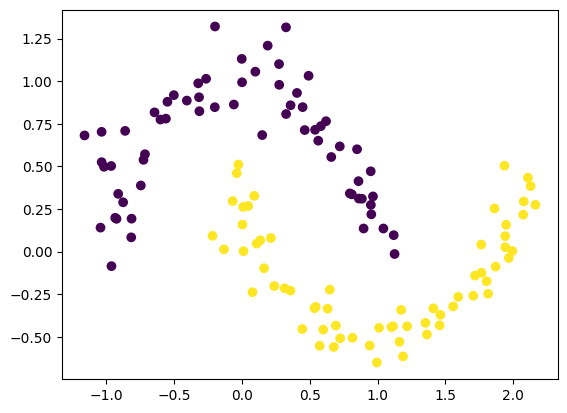

In [1]:
# Basic imports

import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim
import numpy as np
from nflows.flows.base import Flow
from nflows.distributions.normal import ConditionalDiagonalNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation
from nflows.nn.nets import ResidualNet
import pkbar

x, y = datasets.make_moons(128, noise=.1)
plt.scatter(x[:, 0], x[:, 1], c=y);

In [2]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_layers = 5
base_dist = ConditionalDiagonalNormal(shape=[2],
                                      context_encoder=nn.Linear(1, 4))

transforms = []
for _ in range(num_layers):
    # Permutations
    transforms.append(ReversePermutation(features=2))
    # Affine transformation
    # Notice this is affine, but also autoregressive
    # Autoregressive refers to the way the NN(x_2) functions - not important at this time
    # See slides for reference on affine functions.
    transforms.append(MaskedAffineAutoregressiveTransform(features=2,
                                                          hidden_features=4,
                                                          context_features=1))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist).to(device)
optimizer = optim.Adam(flow.parameters())

### Training and plotting

We are training the model through likelihood maximization. What we expect is that as the model progresses, the likelihood distribution should resemble a density over the data we inject.

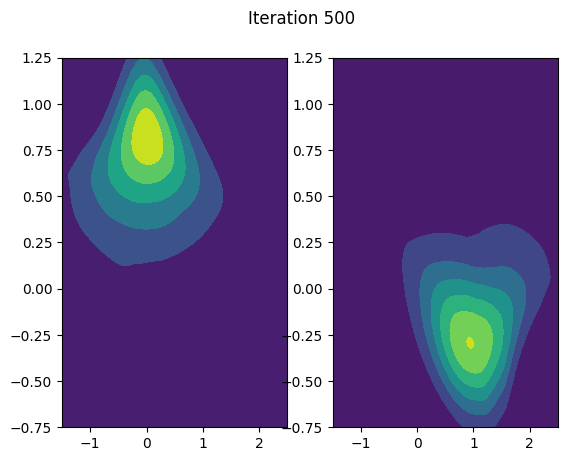

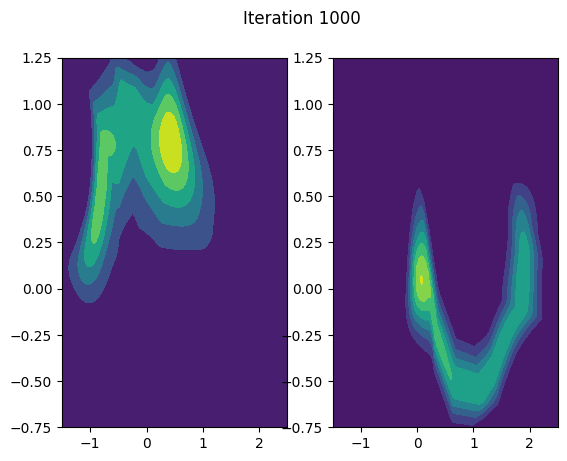

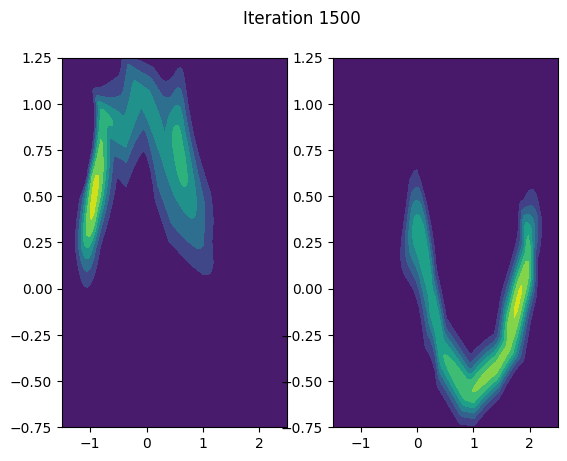

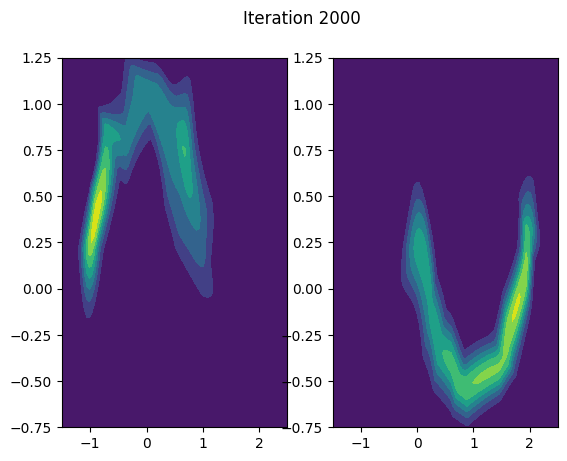

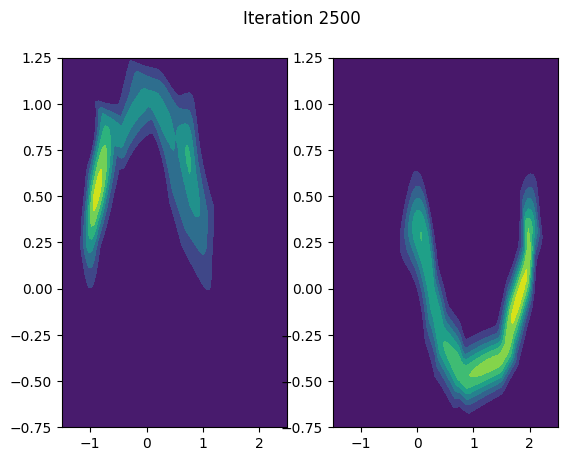

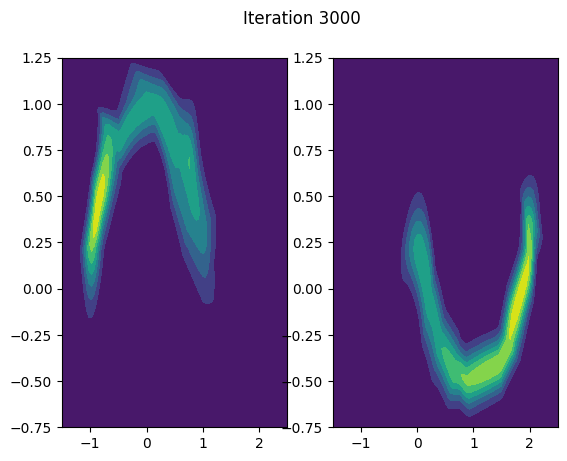

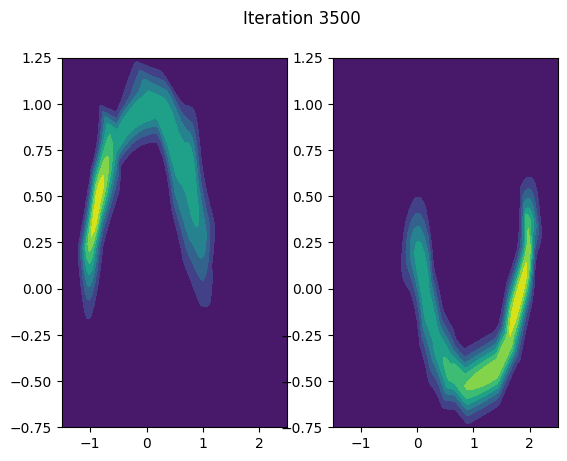

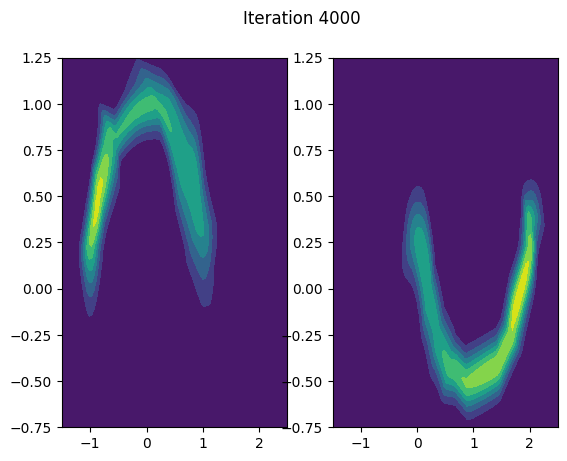

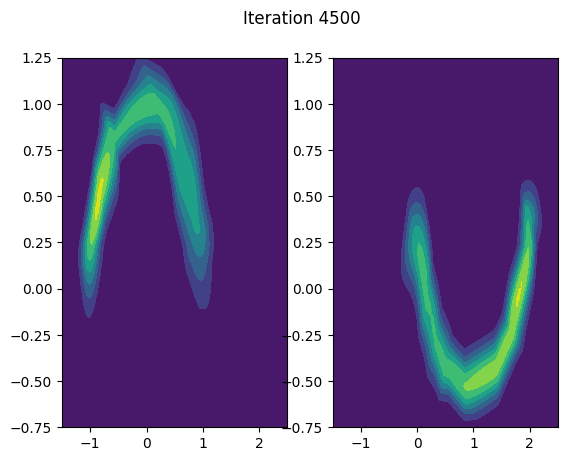

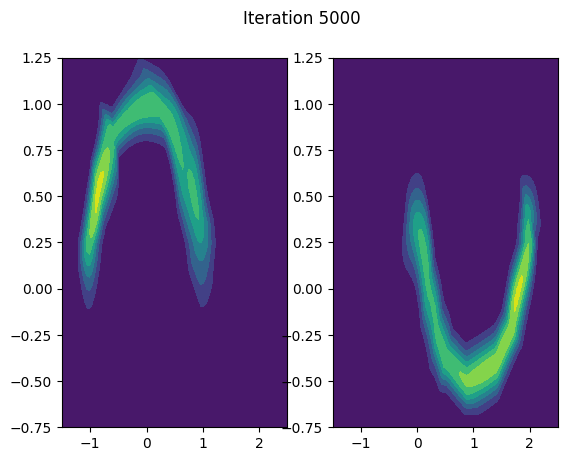

In [3]:


num_iter = 5000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    x = torch.tensor(x, dtype=torch.float32, device=device)
    y = torch.tensor(y, dtype=torch.float32, device=device).reshape(-1, 1)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x, context=y).mean()
    loss.backward()
    optimizer.step()

    if (i + 1) % 500 == 0:
        fig, ax = plt.subplots(1, 2)
        xline = torch.linspace(-1.5, 2.5, steps=100)
        yline = torch.linspace(-.75, 1.25, steps=100)
        xgrid, ygrid = torch.meshgrid(xline, yline, indexing='ij')
        xgrid, ygrid = xgrid.to(device), ygrid.to(device)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid0 = flow.log_prob(xyinput, torch.zeros(10000, 1).to(device)).exp().reshape(100, 100).detach().cpu()
            zgrid1 = flow.log_prob(xyinput, torch.ones(10000, 1).to(device)).exp().reshape(100, 100).detach().cpu()

        ax[0].contourf(xgrid.cpu().numpy(), ygrid.cpu().numpy(), zgrid0.numpy())
        ax[1].contourf(xgrid.cpu().numpy(), ygrid.cpu().numpy(), zgrid1.numpy())
        plt.suptitle('Iteration {}'.format(i + 1))
        plt.show()

### What are we doing here?

1. We are training the model to learn the transformation $z = f(x)$
2. We are plotting the learned density over the distribution, $\textit{i.e.}$, the Probability Density Function over the two distinct classes.

Lets take it a step further. Now we want to sample our Normalizing Flow's base distribution, and perform the inverse transformation $x = f^{-1}(x)$ to generate artificial data.

torch.Size([500, 2])


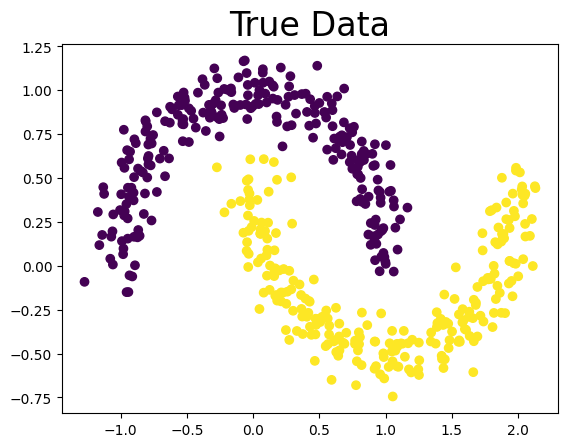

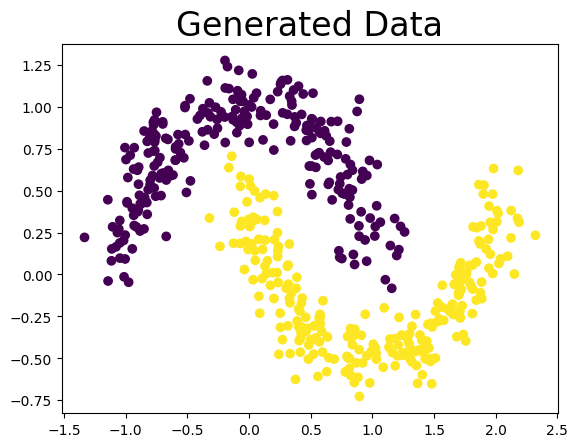

In [4]:
# First lets sample some points from the true distributions to compare.

x, y = datasets.make_moons(500, noise=.1)

# Now lets create a representation of z from a Gaussian Distribution

z_y = torch.tensor(y).to(device).float().reshape(-1, 1)

# We would usually need to create a sample from a Gaussian distribution as follows:
# z = torch.tensor(np.random.normal(loc=0.0,scale=1.0,size=(500,2))).to(device).float()
# NFlows does this under the hood with their distributions! It is much cleaner and more reliable.

x_generated = flow.sample(num_samples=1,context=z_y).reshape(-1,2)
print(x_generated.shape)
x_generated = x_generated.detach().cpu().numpy()

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('True Data',fontsize=24)
plt.show()


plt.scatter(x_generated[:,0],x_generated[:,1],c=y)
plt.title('Generated Data',fontsize=24)
plt.show()

### Can you use this to perform classification?

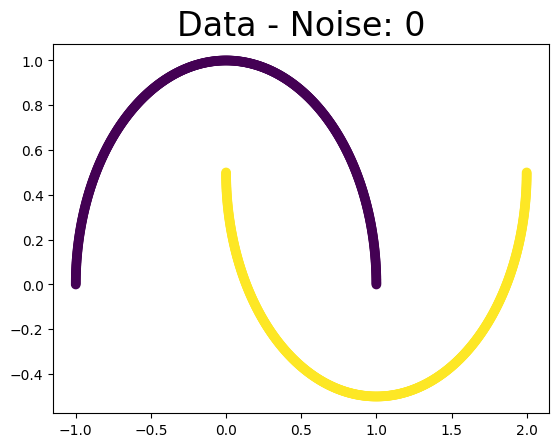

Accuracy:  100.0 %


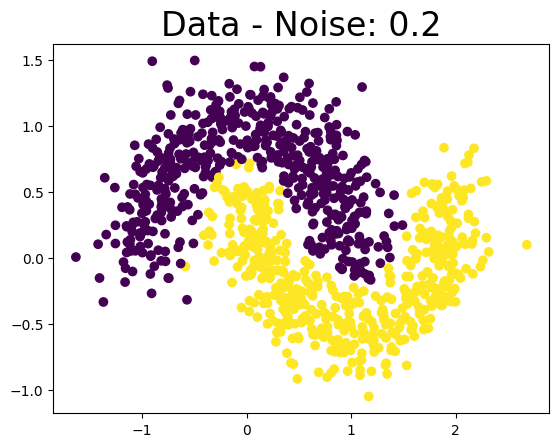

Accuracy:  95.9 %


In [5]:
# First lets sample some points from the true distribution.
# We have trained with some width to the distributions
# Lets see classification results if we have no noise
sigma = 0
x, y = datasets.make_moons(1000, noise=sigma)


# Lets create two hypothesis and assume we do not know the ground truth labels
# Hypothesis of class 0
x_ = torch.tensor(x,device=device,dtype=torch.float32)
hyp_0 = torch.tensor(np.zeros_like(y),device=device,dtype=torch.float32).reshape(-1,1)
# Hypothesis of class 1
hyp_1 = torch.tensor(np.ones_like(y),device=device,dtype=torch.float32).reshape(-1,1)

LL_class_0 = flow.log_prob(x_,context=hyp_0).detach().cpu().numpy()
LL_class_1 = flow.log_prob(x_,context=hyp_1).detach().cpu().numpy()
# We can make predictions based off which likelihood is larger
y_pred = np.zeros_like(y)

y_pred[LL_class_1 > LL_class_0] = 1.0

plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.title('Data - Noise: {0}'.format(sigma),fontsize=24)
plt.show()

print("Accuracy: ",(y_pred == y).sum() * 100 / len(y),"%")

# Lets see classification results if we have double the noise from training
sigma = 0.2
x, y = datasets.make_moons(1000, noise=sigma)


# Lets create two hypothesis and assume we do not know the ground truth labels
# Hypothesis of class 0
x_ = torch.tensor(x,device=device,dtype=torch.float32)
hyp_0 = torch.tensor(np.zeros_like(y),device=device,dtype=torch.float32).reshape(-1,1)
# Hypothesis of class 1
hyp_1 = torch.tensor(np.ones_like(y),device=device,dtype=torch.float32).reshape(-1,1)

LL_class_0 = flow.log_prob(x_,context=hyp_0).detach().cpu().numpy()
LL_class_1 = flow.log_prob(x_,context=hyp_1).detach().cpu().numpy()
# We can make predictions based off which likelihood is larger
y_pred = np.zeros_like(y)

y_pred[LL_class_1 > LL_class_0] = 1.0

plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.title('Data - Noise: {0}'.format(sigma),fontsize=24)
plt.show()

print("Accuracy: ",(y_pred == y).sum() * 100 / len(y),"%")

Lets write a function to see how our performance changes as a function of noise.

Sigma =  0.0  Accuracy:  100.0 %
Sigma =  0.1  Accuracy:  99.8 %
Sigma =  0.2  Accuracy:  97.0 %
Sigma =  0.3  Accuracy:  90.5 %
Sigma =  0.4  Accuracy:  82.3 %
Sigma =  0.5  Accuracy:  75.6 %
Sigma =  0.6  Accuracy:  70.2 %
Sigma =  0.7  Accuracy:  67.6 %
Sigma =  0.8  Accuracy:  60.9 %
Sigma =  0.9  Accuracy:  60.1 %
Sigma =  1.0  Accuracy:  59.0 %


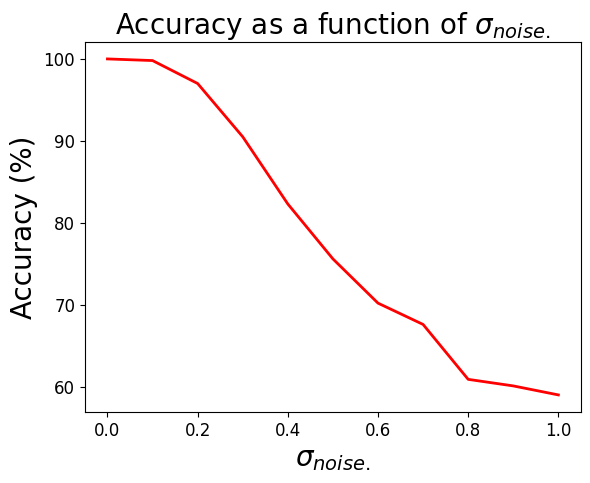

In [6]:
def performance_func_noise(sigmas,flow):
  results = []
  for sigma in sigmas:
    x, y = datasets.make_moons(1000, noise=sigma)
    x_ = torch.tensor(x,device=device,dtype=torch.float32)
    hyp_0 = torch.tensor(np.zeros_like(y),device=device,dtype=torch.float32).reshape(-1,1)
    hyp_1 = torch.tensor(np.ones_like(y),device=device,dtype=torch.float32).reshape(-1,1)

    LL_class_0 = flow.log_prob(x_,context=hyp_0).detach().cpu().numpy()
    LL_class_1 = flow.log_prob(x_,context=hyp_1).detach().cpu().numpy()
    # We can make predictions based off which likelihood is larger
    y_pred = np.zeros_like(y)

    y_pred[LL_class_1 > LL_class_0] = 1.0
    print("Sigma = ",sigma," Accuracy: ",(y_pred == y).sum() * 100 / len(y),"%")
    results.append((y_pred == y).sum() * 100 / len(y))

  return results

sigmas = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
results = performance_func_noise(sigmas,flow)

plt.plot(sigmas,results,color='red',lw='2',linestyle='-')
plt.xlabel(r"$\sigma_{noise.}$",fontsize=20)
plt.ylabel("Accuracy (%)",fontsize=20)
plt.title(r"Accuracy as a function of $\sigma_{noise.}$",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()